In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings

In [17]:
#import dataset
titanic_train = pd.read_csv("/Users/sooriya/Downloads/titanic/train.csv")
titanic_test = pd.read_csv("/Users/sooriya/Downloads/titanic/test.csv")

In [18]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
data             0
dtype: int64

In [24]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
data             0
dtype: int64

In [22]:
titanic_train['data'] = 'train'
titanic_test['data'] = 'test'

In [27]:
all_data = pd.concat([titanic_train,titanic_test],axis =0)
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [28]:
all_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,test


In [30]:
all_data.shape

(1309, 13)

In [29]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  data         1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [33]:
#preprocessing step
#step1: check missing data
all_data.isnull().sum()/len(all_data)*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
data            0.000000
dtype: float64

In [36]:
# cabin data has 77% missing - so we have to drop this column
all_data = all_data.drop(['Cabin'],axis=1)

KeyError: "['Cabin'] not found in axis"

In [35]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Embarked     1307 non-null   object 
 11  data         1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [39]:
all_data['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

<Axes: ylabel='Age'>

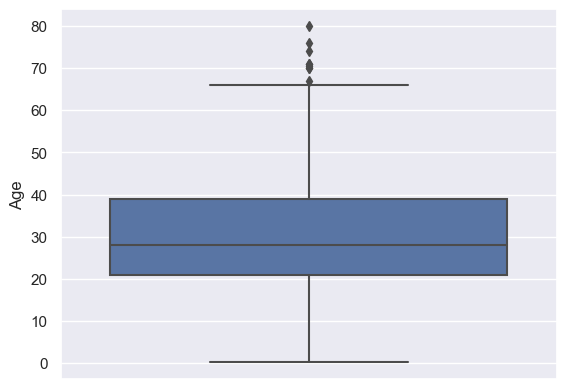

In [40]:
sns.boxplot(y="Age",data = all_data)

In [41]:
all_data['Age'].mean()

29.881137667304014

In [42]:
all_data['Age'].median()

28.0

In [44]:
all_data['Age'] = all_data['Age'].fillna(all_data['Age'].median())

In [46]:
all_data.isnull().sum()/len(all_data)*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Embarked        0.152788
data            0.000000
dtype: float64

In [47]:
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'data'],
      dtype='object')

In [70]:
#certain variables are non-significant and hence we have to drop them.
#PassengerId,Name,Ticket,Fare

In [49]:
all_data = all_data.drop(['PassengerId','Name','Ticket','Fare'],axis=1)

In [50]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Embarked  1307 non-null   object 
 7   data      1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 92.0+ KB


In [56]:
all_data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [57]:
all_data['Embarked'] = all_data["Embarked"].fillna('S')

In [60]:
all_data['Survived'].value_counts().sum()

891

In [62]:
titanic_train['Survived'].isnull().sum()

0

In [63]:
#handling missing value is completed.

In [65]:
#Encoding required-converting objects to float

In [66]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Embarked  1309 non-null   object 
 7   data      1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 92.0+ KB


In [67]:
all_data = pd.get_dummies(all_data,columns=['Pclass'])

In [68]:
all_data.head()

,Survived,Sex,Age,SibSp,Parch,Embarked,data,Pclass_1,Pclass_2,Pclass_3
0,0.0,male,22.0,1,0,S,train,0,0,1
1,1.0,female,38.0,1,0,C,train,1,0,0
2,1.0,female,26.0,0,0,S,train,0,0,1
3,1.0,female,35.0,1,0,S,train,1,0,0
4,0.0,male,35.0,0,0,S,train,0,0,1


In [69]:
all_data = pd.get_dummies(all_data,columns=['Sex'])
all_data.head()

,Survived,Age,SibSp,Parch,Embarked,data,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0.0,22.0,1,0,S,train,0,0,1,0,1
1,1.0,38.0,1,0,C,train,1,0,0,1,0
2,1.0,26.0,0,0,S,train,0,0,1,1,0
3,1.0,35.0,1,0,S,train,1,0,0,1,0
4,0.0,35.0,0,0,S,train,0,0,1,0,1


In [71]:
all_data = pd.get_dummies(all_data,columns=['Embarked'])
all_data.head()

,Survived,Age,SibSp,Parch,data,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,22.0,1,0,train,0,0,1,0,1,0,0,1
1,1.0,38.0,1,0,train,1,0,0,1,0,1,0,0
2,1.0,26.0,0,0,train,0,0,1,1,0,0,0,1
3,1.0,35.0,1,0,train,1,0,0,1,0,0,0,1
4,0.0,35.0,0,0,train,0,0,1,0,1,0,0,1


In [72]:
#Dummy variable(n-1)
all_data = all_data.drop(['Pclass_1','Sex_female','Embarked_C'],axis=1)

In [73]:
all_data.head()

,Survived,Age,SibSp,Parch,data,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.0,22.0,1,0,train,0,1,1,0,1
1,1.0,38.0,1,0,train,0,0,0,0,0
2,1.0,26.0,0,0,train,0,1,0,0,1
3,1.0,35.0,1,0,train,0,0,0,0,1
4,0.0,35.0,0,0,train,0,1,1,0,1


In [74]:
all_data['SibSp'].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

<Axes: ylabel='SibSp'>

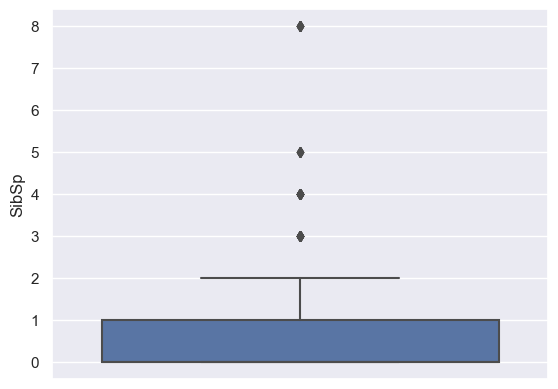

In [75]:
sns.boxplot(y='SibSp',data=all_data)

In [76]:
#outlier treatment-There is no outlier found in the dataset(age range is correct)
#since, it is logistic regression, no need to handle outliers.
#But, in case of linear regression , we need to handle outliers.

In [77]:
#part 4 - feature scaling - hold it, 
#if your accuracy is not good,then we have to feature scaling.

In [78]:
# we do feature scaling to normalize values from 0 to 1 or standardize to get values from -3 to 3.
#Since, age is higher here, it might have bias towards predicting the output.

In [80]:
titanic_train.duplicated().sum()

0

In [81]:
titanic_test.duplicated().sum()

0

In [82]:
#Segregate train and test
titanic_train = all_data[all_data['data']=='train']
titanic_test  = all_data[all_data['data']=='test']

In [85]:
titanic_train.shape


(891, 10)

In [84]:
titanic_test.shape

(418, 10)

In [87]:
titanic_train = titanic_train.drop(['data'],axis=1)
titanic_test =titanic_test.drop(['data'],axis=1)

In [89]:
titanic_train.head()

,Survived,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.0,22.0,1,0,0,1,1,0,1
1,1.0,38.0,1,0,0,0,0,0,0
2,1.0,26.0,0,0,0,1,0,0,1
3,1.0,35.0,1,0,0,0,0,0,1
4,0.0,35.0,0,0,0,1,1,0,1


In [91]:
#split the data into independent and dependent variable
x=titanic_train.drop(['Survived'],axis=1)
y=titanic_train['Survived']

In [92]:
x.head()

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,0,1,1,0,1
1,38.0,1,0,0,0,0,0,0
2,26.0,0,0,0,1,0,0,1
3,35.0,1,0,0,0,0,0,1
4,35.0,0,0,0,1,1,0,1


In [93]:
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [94]:
titanic_test.head()

,Survived,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,NaN,34.5,0,0,0,1,1,1,0
1,NaN,47.0,1,0,0,1,0,0,1
2,NaN,62.0,0,0,1,0,1,1,0
3,NaN,27.0,0,0,0,1,1,0,1
4,NaN,22.0,1,1,0,1,0,0,1


In [96]:
x1=titanic_test.drop(['Survived'],axis=1)
y1=titanic_test['Survived']

In [97]:
x1.head()

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,34.5,0,0,0,1,1,1,0
1,47.0,1,0,0,1,0,0,1
2,62.0,0,0,1,0,1,1,0
3,27.0,0,0,0,1,1,0,1
4,22.0,1,1,0,1,0,0,1


In [98]:
y1.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Survived, dtype: float64

In [100]:
#last preprocessing part -Imbalance data check
#it's balance dataset
y.value_counts()
#this is all about preprocessing part

0.0    549
1.0    342
Name: Survived, dtype: int64

In [101]:
# EDA-Exploratory data Analysis

In [103]:
#Univariate Analysis
for i in all_data.columns:
    print("*********",i,
         "******************")
    print()
    print(set(all_data[i].tolist()))
    print()

********* Survived ******************

{0.0, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

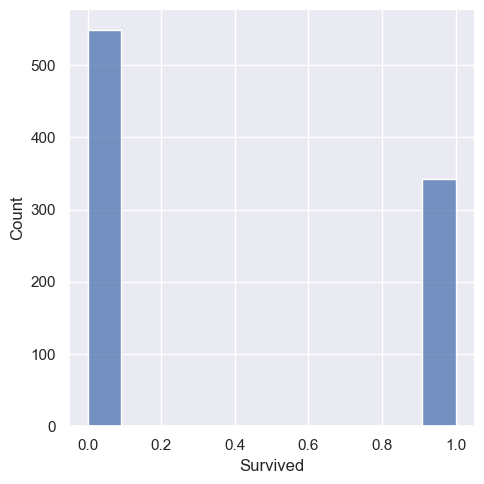

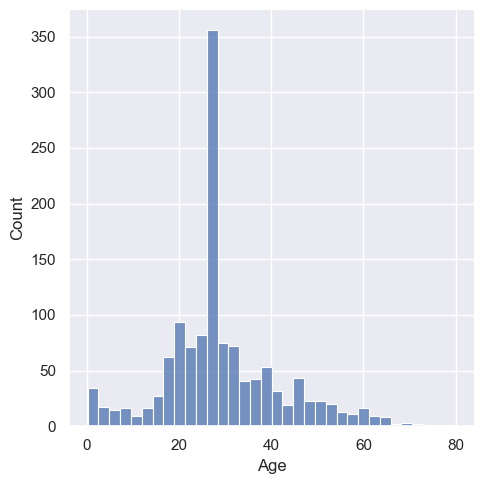

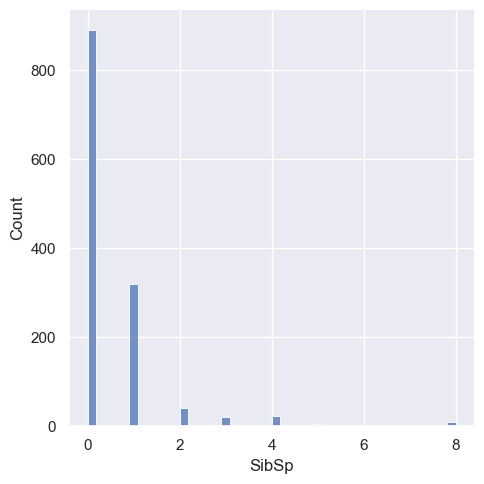

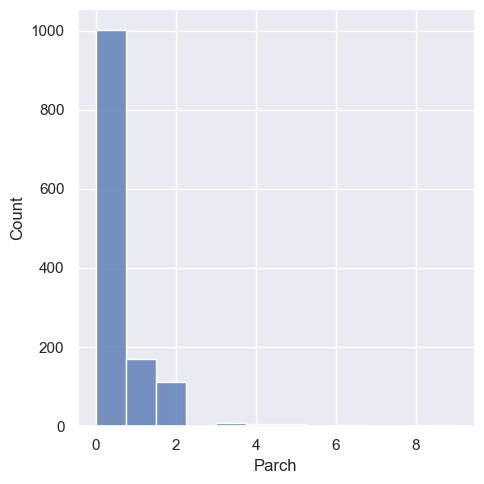

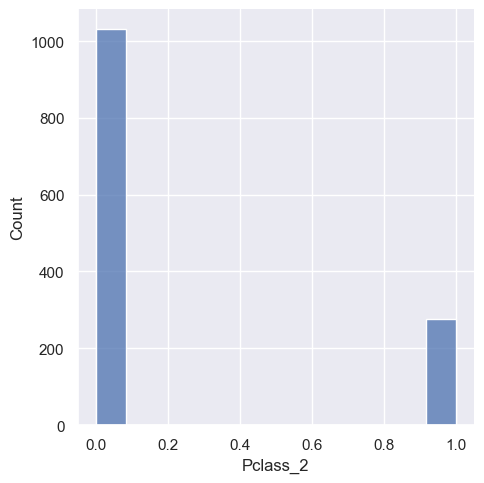

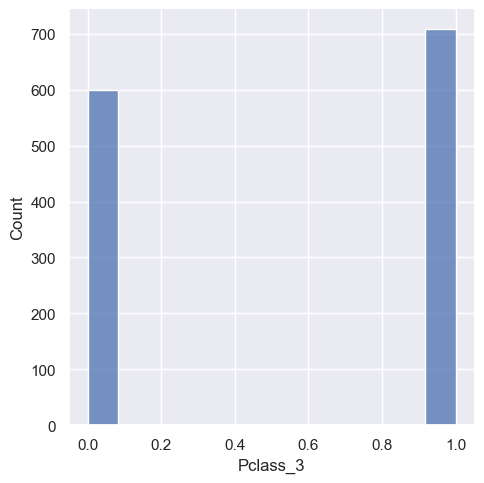

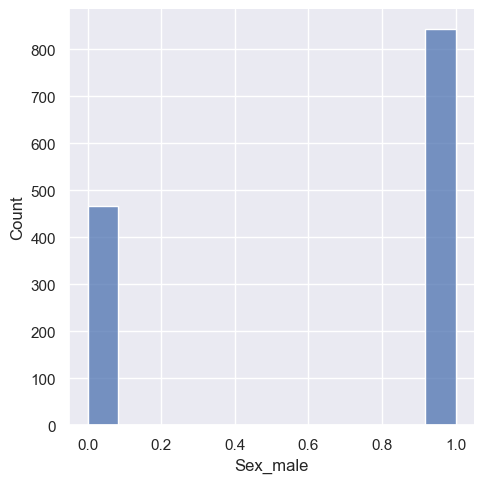

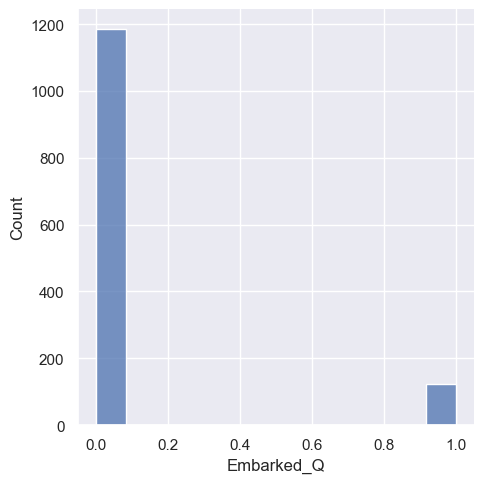

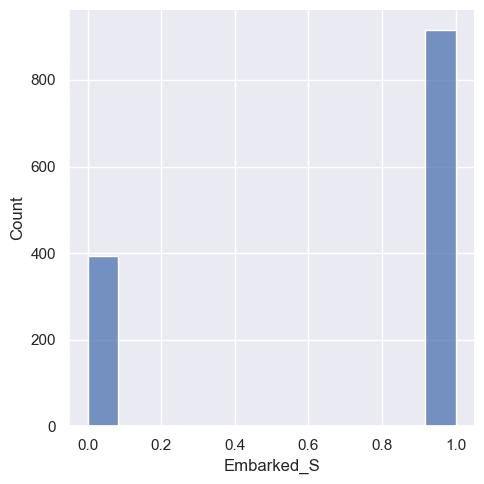

In [108]:
def distplots(col):
    sns.displot(all_data[col])
    plt.show()
    
for i in list(all_data.select_dtypes(exclude=['object']).columns):
    distplots(i)

/var/folders/xj/528n9mxn5cldks_f29h344240000gn/T/ipykernel_46535/653993565.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(all_data.corr(),annot=True,cmap='rainbow')


<Axes: >

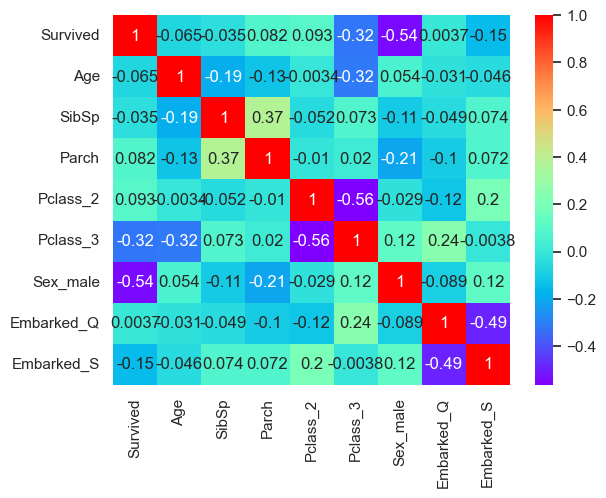

In [109]:
#Multi-variate Analysis
sns.heatmap(all_data.corr(),annot=True,cmap='rainbow')

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,0,1,1,0,1
1,38.0,1,0,0,0,0,0,0
2,26.0,0,0,0,1,0,0,1
3,35.0,1,0,0,0,0,0,1
4,35.0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...
886,27.0,0,0,1,0,1,0,1
887,19.0,0,0,0,0,0,0,1
888,28.0,1,2,0,1,0,0,1
889,26.0,0,0,0,0,1,0,0


In [111]:
#sns.pairplot(titanic_train)-not used for category 

In [116]:
#split data into training and test
#Training for building a model and test for predicting the model performance
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [117]:
x_test

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
331,45.5,0,0,0,0,1,0,1
700,18.0,1,0,0,0,0,0,0
748,19.0,1,0,0,0,1,0,1
751,6.0,0,1,0,1,1,0,1
481,28.0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...
154,28.0,0,0,0,1,1,0,1
454,28.0,0,0,0,1,1,0,1
879,56.0,0,1,0,0,0,0,0
771,48.0,0,0,0,1,1,0,1


In [119]:
y_test

331    0.0
700    1.0
748    0.0
751    1.0
481    0.0
      ... 
154    0.0
454    0.0
879    1.0
771    0.0
466    0.0
Name: Survived, Length: 179, dtype: float64

In [118]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(712, 8) (179, 8) (712,) (179,)


In [120]:
#Building logistic regression model
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)

/Users/sooriya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [124]:
#predict result
logit_model.fit(x_train,y_train)
y_pred_train = logit_model.predict(x_train)
y_pred_test = logit_model.predict(x_test)

/Users/sooriya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [125]:
y_test

331    0.0
700    1.0
748    0.0
751    1.0
481    0.0
      ... 
154    0.0
454    0.0
879    1.0
771    0.0
466    0.0
Name: Survived, Length: 179, dtype: float64

In [126]:
y_pred_test

array([0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 0., 0.])

In [128]:
#Evaluate the model result
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [130]:
print("confusion Matrix")
confusion_matrix(y_test,y_pred_test)

confusion Matrix


array([[89, 10],
       [24, 56]])

In [133]:
print("confusion Matrix")
c = confusion_matrix(y_test,y_pred_test)
print(c)
print('\n')
print("classification_report")
d=classification_report(y_test,y_pred_test)
print(d)
print('\n')
print("Training Accuracy",accuracy_score(y_train,y_pred_train))
print("**********"*5)
print("Test Accuracy",accuracy_score(y_test,y_pred_test))

confusion Matrix
[[89 10]
 [24 56]]


classification_report
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84        99
         1.0       0.85      0.70      0.77        80

    accuracy                           0.81       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



Training Accuracy 0.8089887640449438
**************************************************
Test Accuracy 0.8100558659217877
